In [343]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns

In [344]:
%matplotlib inline

In [345]:
 gdp_df = pd.read_csv("../data/gdp_percapita.csv",nrows = 6729)
internet_df = pd.read_csv("../data/internet_use.csv",nrows = 4495)


In [346]:
#Using the pandas read_csv() function, read the GDP dataset into your notebook as a DataFrame called gdp_df. Take a look at the first 6 rows.
gdp_df.head(6)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2018,1734.723214,NaN
1,Afghanistan,2017,1758.465636,NaN
2,Afghanistan,2016,1757.023490,NaN
3,Afghanistan,2015,1766.593077,NaN
4,Afghanistan,2014,1795.735834,NaN
5,Afghanistan,2013,1807.762344,NaN


In [347]:
#Repeat for the internet use dataset. Call this DataFrame internet_df. Take a look at the first six rows.
internet_df.head(6)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN
5,Afghanistan,2009,3.550000,NaN


In [348]:
#Look at the shape of each dataframe - how many rows, how many columns.
internet_df.shape

(4495, 4)

In [349]:
gdp_df.shape

(6729, 4)

In [350]:
#Take a look at the data types for the columns in each table.
print(gdp_df.dtypes)

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object


In [351]:
print(internet_df.dtypes)

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object


In [352]:
internet_df['Year'] = internet_df['Year'].astype(int)

In [353]:
#Take a look at the last 10 rows of each dataset in turn.
gdp_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
6719,Zimbabwe,1999,3054.064189,NaN
6720,Zimbabwe,1998,3099.076182,NaN
6721,Zimbabwe,1997,3036.422224,NaN
6722,Zimbabwe,1996,2985.856605,NaN
6723,Zimbabwe,1995,2736.486436,NaN
6724,Zimbabwe,1994,2768.309953,NaN
6725,Zimbabwe,1993,2572.870395,NaN
6726,Zimbabwe,1992,2591.007534,NaN
6727,Zimbabwe,1991,2906.272849,NaN
6728,Zimbabwe,1990,2819.549467,NaN


In [354]:
internet_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
4485,Zimbabwe,2002,3.994356,NaN
4486,Zimbabwe,2001,0.799846,NaN
4487,Zimbabwe,2000,0.401434,NaN
4488,Zimbabwe,1999,0.161676,NaN
4489,Zimbabwe,1998,0.081648,NaN
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN
4494,Zimbabwe,1990,0.000000,NaN


In [355]:
#Drop the 'value footnotes' data from both datasets. Check that this worked as expected.
gdp_df = gdp_df.drop(columns = ('Value Footnotes'))
gdp_df.head()

,Country or Area,Year,Value
0,Afghanistan,2018,1734.723214
1,Afghanistan,2017,1758.465636
2,Afghanistan,2016,1757.023490
3,Afghanistan,2015,1766.593077
4,Afghanistan,2014,1795.735834


In [356]:
internet_df = internet_df.drop(columns = ['Value Footnotes'])
internet_df.head()

,Country or Area,Year,Value
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000


In [357]:
#Change the columns for the GDP Per Capita data frame to ‘Country’, ‘Year’, and ‘GDP_Per_Capita’.
gdp_df = gdp_df.rename(columns = {"Country or Area":"Country","Value":"GDP_per_Capita"})
gdp_df.head()

,Country,Year,GDP_per_Capita
0,Afghanistan,2018,1734.723214
1,Afghanistan,2017,1758.465636
2,Afghanistan,2016,1757.023490
3,Afghanistan,2015,1766.593077
4,Afghanistan,2014,1795.735834


In [358]:
#Change the columns for the Internet Users data frame to ‘Country’, ‘Year’, and ‘Internet_Users_Pct’.
internet_df = internet_df.rename(columns = {"Country or Area":"Country","Value":"Internet_Users_Pct"})
internet_df.head()

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000


In [359]:
#Merge the two DataFrames to one. Merge all rows from each of the two DataFrames. Call the new DataFrame gdp_and_internet_use.

gdp_and_internet_use = pd.merge(gdp_df, internet_df, on=['Country','Year'], how='outer')

In [360]:
#Look at the first five rows of your new data frame to confirm the columns are how you expect.
gdp_and_internet_use.head()

,Country,Year,GDP_per_Capita,Internet_Users_Pct
0,Afghanistan,2018,1734.723214,NaN
1,Afghanistan,2017,1758.465636,NaN
2,Afghanistan,2016,1757.023490,NaN
3,Afghanistan,2015,1766.593077,NaN
4,Afghanistan,2014,1795.735834,6.39


In [361]:
#Look at the last five rows to make sure the data is clean and as expected.
gdp_and_internet_use.tail()

,Country,Year,GDP_per_Capita,Internet_Users_Pct
7700,Virgin Islands (U.S.),1997,NaN,6.948369
7701,Virgin Islands (U.S.),1996,NaN,4.647186
7702,Virgin Islands (U.S.),1995,NaN,2.801958
7703,Virgin Islands (U.S.),1994,NaN,0.940645
7704,Virgin Islands (U.S.),1990,NaN,0.000000


In [362]:
#Look at the shape of the new dataset. Were any rows dropped?
gdp_and_internet_use.shape

#rows were dropped

(7705, 4)

In [363]:
#Subset the combined data frame to keep only the data for 2004, 2009, and 2014. Check that this happened correctly.
gdp_and_internet_sub = gdp_and_internet_use[
(gdp_and_internet_use.Year.isin(['2004','2009','2014']))

]
gdp_and_internet_sub

,Country,Year,GDP_per_Capita,Internet_Users_Pct
4,Afghanistan,2014,1795.735834,6.390000
9,Afghanistan,2009,1502.354073,3.550000
14,Afghanistan,2004,1025.208245,0.105809
21,Albania,2014,10700.993216,60.100000
26,Albania,2009,9525.377979,41.200000
...,...,...,...,...
7668,Viet Nam,2009,NaN,26.550000
7673,Viet Nam,2004,NaN,7.642409
7683,Virgin Islands (U.S.),2014,NaN,50.070000
7688,Virgin Islands (U.S.),2009,NaN,27.396510


In [364]:
#Create three new data frames, one for 2004, one for 2009, and one for 2014. Give them meaningful names that aren't too long.
gdp_int_04 = gdp_and_internet_use.query('Year == 2004').reset_index(drop = True)
gdp_int_09 = gdp_and_internet_use.query('Year == 2009').reset_index(drop = True)
gdp_int_14 = gdp_and_internet_use.query('Year == 2014').reset_index(drop = True)

In [365]:
#Which country had the highest percentage of internet users in 2014? What was the percentage? Repeat for 2004 and 2009. (Try typing the first 3 letters of your DataFrame name and hitting the tab for auto-complete options).

gdp_int_14.sort_values(by =['Internet_Users_Pct'], ascending = False)
## Iceland has the top Internet_users Pct at 98.16%.

,Country,Year,GDP_per_Capita,Internet_Users_Pct
89,Iceland,2014,42774.888849,98.16
242,Bermuda,2014,NaN,96.80
159,Norway,2014,63328.259526,96.30
49,Denmark,2014,45057.083449,95.99
240,Andorra,2014,NaN,95.90
...,...,...,...,...
223,Tuvalu,2014,3141.056160,NaN
229,Upper middle income,2014,14770.977043,NaN
234,Vietnam,2014,5312.492183,NaN
235,West Bank and Gaza,2014,4445.307470,NaN


In [366]:
gdp_int_04.sort_values(by =['Internet_Users_Pct'], ascending = False)
## Sweden has the top Internet_users Pct at 83.89%.

,Country,Year,GDP_per_Capita,Internet_Users_Pct
207,Sweden,2004,40177.850408,83.89
91,Iceland,2004,38893.378798,83.88
50,Denmark,2004,43670.446201,80.93
160,Norway,2004,61612.275634,77.69
260,Korea (Rep. of),2004,NaN,72.70
...,...,...,...,...
221,Tuvalu,2004,3037.434007,NaN
227,Upper middle income,2004,8799.715484,NaN
232,Vietnam,2004,3214.185135,NaN
233,West Bank and Gaza,2004,3324.834407,NaN


In [367]:
gdp_int_09.sort_values(by =['Internet_Users_Pct'], ascending = False)
## Iceland has the top Internet_users Pct at 93.00%.

,Country,Year,GDP_per_Capita,Internet_Users_Pct
91,Iceland,2009,41505.084834,93.00
161,Norway,2009,62617.153609,92.08
210,Sweden,2009,41327.626252,91.00
154,Netherlands,2009,45724.862764,89.63
128,Luxembourg,2009,89098.734264,87.31
...,...,...,...,...
216,The Gambia,2009,2467.890291,NaN
230,Upper middle income,2009,11631.478894,NaN
235,Vietnam,2009,4207.756178,NaN
236,West Bank and Gaza,2009,3816.165070,NaN


In [368]:
#Which country had the lowest percentage of internet users in 2014? What was the percentage? Repeat for 2004 and 2009.
gdp_int_14.sort_values(by =['Internet_Users_Pct'], ascending = True)
## Dem. People's Rep. of Korea 'North Korea' has the bottom Internet_users Pct at 0.00%.

,Country,Year,GDP_per_Capita,Internet_Users_Pct
249,Dem. People's Rep. of Korea,2014,NaN,0.00
252,Eritrea,2014,NaN,0.99
215,Timor-Leste,2014,6466.737732,1.14
27,Burundi,2014,768.469837,1.38
272,Somalia,2014,NaN,1.63
...,...,...,...,...
223,Tuvalu,2014,3141.056160,NaN
229,Upper middle income,2014,14770.977043,NaN
234,Vietnam,2014,5312.492183,NaN
235,West Bank and Gaza,2014,4445.307470,NaN


In [369]:
gdp_int_04.sort_values(by =['Internet_Users_Pct'], ascending = True)
## Dem. People's Rep. of Korea 'North Korea' has the bottom Internet_users Pct at 0.00%.

,Country,Year,GDP_per_Capita,Internet_Users_Pct
246,Dem. People's Rep. of Korea,2004,NaN,0.000000
150,Myanmar,2004,1999.710075,0.024337
122,Liberia,2004,916.487110,0.031011
209,Tajikistan,2004,1644.455641,0.077480
0,Afghanistan,2004,1025.208245,0.105809
...,...,...,...,...
221,Tuvalu,2004,3037.434007,NaN
227,Upper middle income,2004,8799.715484,NaN
232,Vietnam,2004,3214.185135,NaN
233,West Bank and Gaza,2004,3324.834407,NaN


In [370]:
gdp_int_09.sort_values(by =['Internet_Users_Pct'], ascending = True)
## Dem. People's Rep. of Korea 'North Korea' has the bottom Internet_users Pct at 0.00%.

,Country,Year,GDP_per_Capita,Internet_Users_Pct
249,Dem. People's Rep. of Korea,2009,NaN,0.000000
217,Timor-Leste,2009,9275.529371,0.185252
150,Myanmar,2009,3387.818242,0.220000
189,Sierra Leone,2009,1172.862734,0.260000
31,Cambodia,2009,2417.293669,0.530000
...,...,...,...,...
216,The Gambia,2009,2467.890291,NaN
230,Upper middle income,2009,11631.478894,NaN
235,Vietnam,2009,4207.756178,NaN
236,West Bank and Gaza,2009,3816.165070,NaN


In [372]:
#Which country had the highest gdp per capita in 2014? What was the gdp per capita?
gdp_int_14.nlargest(1,['GDP_per_Capita'])
##China with 130439.106674

,Country,Year,GDP_per_Capita,Internet_Users_Pct
127,"Macao SAR, China",2014,130439.106674,NaN


In [373]:
#Which country had the lowest gdp per capita in 2014? What was the gdp per capita?
gdp_int_14.nsmallest(1,['GDP_per_Capita'])
#Central African Republic with 672.681648

,Country,Year,GDP_per_Capita,Internet_Users_Pct
35,Central African Republic,2014,672.681648,NaN


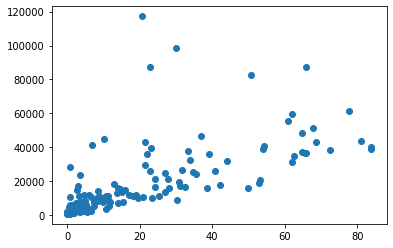

In [206]:
#Create some scatterplots:
#a. 2004 Percent Using the Internet vs GDP Per Capita
plt.scatter(gdp_int_04['Internet_Users_Pct'],gdp_int_04['GDP per Capita'])

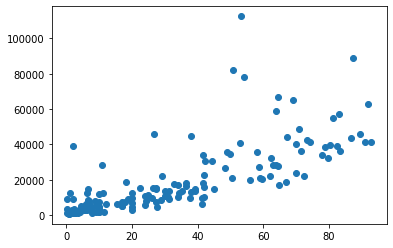

In [209]:
#b. 2009 Percent Using the Internet vs GDP Per Capita
plt.scatter(gdp_int_09['Internet_Users_Pct'],gdp_int_09['GDP per Capita'])

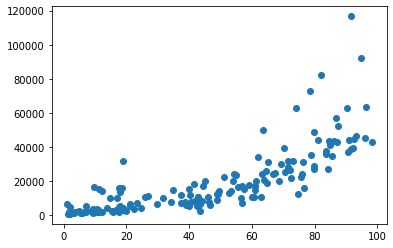

In [210]:
#c. 2014 Percent Using the Internet vs GDP Per Capita
plt.scatter(gdp_int_14['Internet_Users_Pct'],gdp_int_14['GDP per Capita'])

In [ ]:
##Are there differences across years? What do the plots tell you about any relationship between these two variables? Enter your observations as a markdown cell.

## As time moves forward countries with high GDPs have a sharp increase in Internet pct.

C:\Users\320080011\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\320080011\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


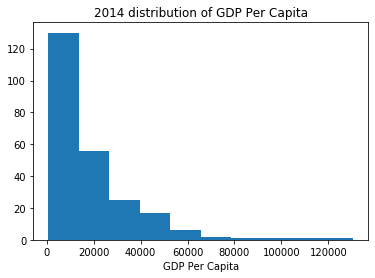

In [216]:
##Look at the distribution of gdp per capita values for 2014. Is it unimodal?
plt.hist(gdp_int_14['GDP per Capita'], bins = 10)
plt.xlabel('GDP Per Capita')
plt.title('2014 distribution of GDP Per Capita')
##Yes, there is a distribution that occurs more often than the others.

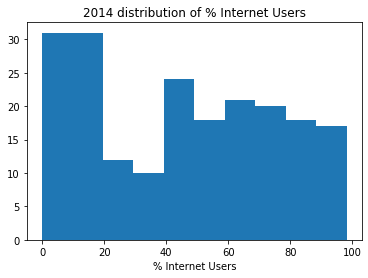

In [222]:
##Look at the distribution of Internet Use for 2014. Is it unimodal?
plt.hist(gdp_int_14['Internet_Users_Pct'], bins = 10)
plt.xlabel('% Internet Users')
plt.title('2014 distribution of % Internet Users')
plt.show()

## No, there is no set mode.

In [410]:
##What are the top 5 countries in terms of internet use in 2014?
int_14 = gdp_int_14.nlargest(5,['Internet_Users_Pct'])
int_2014 = int_14['Country']

In [411]:
##Create a data frame called top_5_internet from the combined data frame that has all three years for these 5 countries. You should have 15 rows. Check that this is true.
top_country_list = int_2014
top_5_internet = gdp_and_internet_sub[gdp_and_internet_sub.Country.isin(top_country_list)]
top_5_internet.sort_values(by =['Internet_Users_Pct'], ascending = False)

,Country,Year,GDP_per_Capita,Internet_Users_Pct
2581,Iceland,2014,42774.888849,98.160000
6772,Bermuda,2014,NaN,96.800000
4530,Norway,2014,63328.259526,96.300000
1404,Denmark,2014,45057.083449,95.990000
6732,Andorra,2014,NaN,95.900000
2586,Iceland,2009,41505.084834,93.000000
4535,Norway,2009,62617.153609,92.080000
1409,Denmark,2009,43382.615688,86.840000
2591,Iceland,2004,38893.378798,83.880000
542,Bermuda,2009,57151.919132,83.250000


In [412]:
top_5_internet.shape

(15, 4)

In [413]:
#Create a seaborn FacetGrid to show the internet usage trend over time for these 5 countries (those with the highest reported internet use in 2014). Which country had the greatest growth between 2004 and 2014? Is there a plotting issue with Bermuda? Can you fix it?
top_5_internet = top_5_internet.sort_values(by=['Year'], ascending = True)

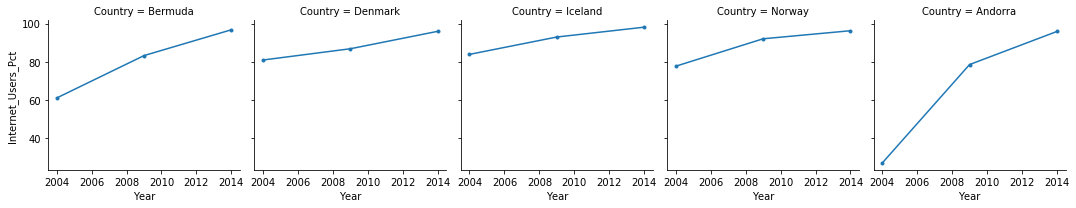

In [414]:
top_5_internet_g = sns.FacetGrid(top_5_internet, col="Country")
top_5_internet_g = top_5_internet_g.map(plt.plot, "Year", "Internet_Users_Pct", marker=".")

##Andorra had the highest growth pct between 2004 and 2014. There is a plotting issue with bermuda.Yes, by sorting your original data frame.

In [415]:
##Repeat the steps above to look at the trend for the 5 countries with the lowest 2014 internet usage. Which country has consistently had the least internet use?
int_small_14 = gdp_int_14.nsmallest(5,['Internet_Users_Pct'])
int_small_2014 = int_small_14['Country']

In [416]:
##Repeat the steps above to look at the trend for the 5 countries with the lowest 2014 internet usage. Which country has consistently had the least internet use?
Bottom_country_list = ["Dem. People's Rep. of Korea","Eritrea","Timor-Leste","Burundi","Somalia"]
Bottom_5_internet = gdp_and_internet_sub[gdp_and_internet_sub.Country.isin(Bottom_country_list)]
Bottom_5_internet.sort_values(by =['Internet_Users_Pct'], ascending = True)

,Country,Year,GDP_per_Capita,Internet_Users_Pct
6940,Dem. People's Rep. of Korea,2014,NaN,0.000000
6944,Dem. People's Rep. of Korea,2009,NaN,0.000000
6949,Dem. People's Rep. of Korea,2004,NaN,0.000000
6049,Timor-Leste,2009,9275.529371,0.185252
804,Burundi,2004,708.833720,0.349060
1722,Eritrea,2009,1950.533339,0.540000
799,Burundi,2009,721.063140,0.900000
6999,Eritrea,2014,NaN,0.990000
7530,Somalia,2004,NaN,1.053455
6044,Timor-Leste,2014,6466.737732,1.140000


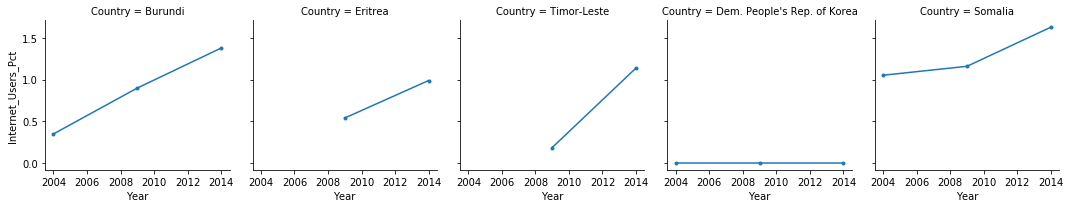

In [417]:
Bottom_5_internet_g = sns.FacetGrid(Bottom_5_internet, col="Country")
Bottom_5_internet_g = Bottom_5_internet_g.map(plt.plot, "Year", "Internet_Users_Pct", marker=".")
##Dem. People's Rep. of Korea Consistently has the worst pct of internet users.

In [418]:
##Find the top 5 countries for 2014 in terms of GDP per capita; create a dataframe to look at 10-year trends in gdp per capita for those 5 countries. Use a seaborn facet grid for this.
gdp_14 = gdp_int_14.nlargest(5,['GDP_per_Capita'])
gdp_2014 = gdp_14['Country']

In [419]:
Top_gdp_list = gdp_2014
Top_5_gdp = gdp_and_internet_sub[gdp_and_internet_sub.Country.isin(Top_gdp_list)]
Top_5_gdp.sort_values(by =['Year'], ascending = True)

,Country,Year,GDP_per_Capita,Internet_Users_Pct
717,Brunei,2004,83963.238066,NaN
3620,Luxembourg,2004,87209.819367,65.880000
3649,"Macao SAR, China",2004,60791.976853,NaN
5013,Qatar,2004,117271.427067,20.701648
5326,Singapore,2004,59732.958543,62.000000
712,Brunei,2009,79485.001581,NaN
3615,Luxembourg,2009,89098.734264,87.310000
3644,"Macao SAR, China",2009,79955.986107,NaN
5008,Qatar,2009,112525.718267,53.100000
5321,Singapore,2009,64934.799310,69.000000


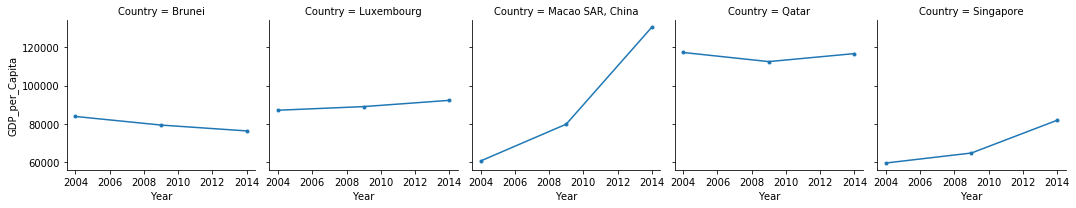

In [421]:
Top_5_gdp_g = sns.FacetGrid(Top_5_gdp, col="Country")
Top_5_gdp_g = Top_5_gdp_g.map(plt.plot, "Year", "GDP_per_Capita", marker=".")

In [424]:
##Repeat this one more time to look at 10-year trend for the bottom 5 countries for 2014 in terms of GDP per capita.
gdp_small_14 = gdp_int_14.nsmallest(5,['GDP_per_Capita'])
gdp_small_2014 = gdp_small_14['Country']

In [425]:
Bottom_gdp_list = ["Central African Republic","Burundi", "Dem. Rep. Congo","Niger","Malawi"]
Bottom_5_gdp = gdp_and_internet_sub[gdp_and_internet_sub.Country.isin(Bottom_gdp_list)]
Bottom_5_gdp.sort_values(by =['Year'], ascending = True)

,Country,Year,GDP_per_Capita,Internet_Users_Pct
804,Burundi,2004,708.833720,0.349060
1024,Central African Republic,2004,848.689032,NaN
1385,Dem. Rep. Congo,2004,577.483297,NaN
3707,Malawi,2004,862.392437,0.347505
4424,Niger,2004,757.751262,0.189934
799,Burundi,2009,721.063140,0.900000
1019,Central African Republic,2009,949.551325,NaN
1380,Dem. Rep. Congo,2009,636.875743,NaN
3702,Malawi,2009,1037.598513,1.070000
4419,Niger,2009,778.982257,0.760000


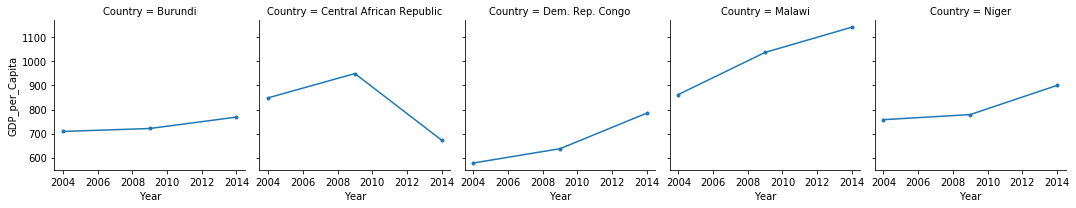

In [427]:
Bottom_5_gdp_g = sns.FacetGrid(Bottom_5_gdp, col="Country")
Bottom_5_gdp_g = Bottom_5_gdp_g.map(plt.plot, "Year", "GDP_per_Capita", marker=".")

In [ ]:
#Is there anything surprising or unusual in any of these plots? Searching on the internet, can you find any possible explanations for unusual findings?

## The GDP for the Central African Republic sharply declines after 2009. This could be related to the current ongoing conflict and civil war that is currently happening in the country.